# Image Generation

## 1.1 Generative adversarial network
#### In this exercise, you will implement a Deep Convolutional Generative Network (DCGAN) to synthesis images by using the provided anime faces dataset.

---


- Construct a <font color=red>$\text{DCGAN}$</font> with GAN objective, you can refer to the [tutorial website](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html) provided by PyTorch} for implementation.
    \begin{equation*} \begin{aligned}
    &\max _{D} \mathcal{L}(D) =\mathbb{E}_{\boldsymbol{x} \sim p_{\text {data }}} \log D(\boldsymbol{x})+\mathbb{E}_{z \sim p_{\boldsymbol{z}}} \log (1-D(G(\boldsymbol{z}))) \\
    &\min _{G} \mathcal{L}(G) =\mathbb{E}_{z \sim p_{x}} \log (1-D(G(\boldsymbol{z}))
    \end{aligned} \end{equation*}
- <font color=red>Draw</font> some samples generated from your generator at <font color=red>different training stages </font>. For example, you may show the results when running at $5^{\text{th}}$ and final epoch 100. (10\%)


<img src="https://i.imgur.com/tnRR3tr.png" width="350px" />
<img src="https://i.imgur.com/g9AnDwN.png" width="350px" />





In [1]:
# Downlaod and unzip data
!gdown 1K1oB7GOUerTCIa68bbxETcGajLeE_5j1
!unzip resized_64x64.zip

串流輸出內容已截斷至最後 5000 行。
  inflating: resized_64x64/62706.jpg  
  inflating: resized_64x64/62707.jpg  
  inflating: resized_64x64/62708.jpg  
  inflating: resized_64x64/62709.jpg  
  inflating: resized_64x64/6271.jpg  
  inflating: resized_64x64/62710.jpg  
  inflating: resized_64x64/62711.jpg  
  inflating: resized_64x64/62712.jpg  
  inflating: resized_64x64/62713.jpg  
  inflating: resized_64x64/62714.jpg  
  inflating: resized_64x64/62715.jpg  
  inflating: resized_64x64/62716.jpg  
  inflating: resized_64x64/62717.jpg  
  inflating: resized_64x64/62718.jpg  
  inflating: resized_64x64/62719.jpg  
  inflating: resized_64x64/6272.jpg  
  inflating: resized_64x64/62720.jpg  
  inflating: resized_64x64/62721.jpg  
  inflating: resized_64x64/62722.jpg  
  inflating: resized_64x64/62723.jpg  
  inflating: resized_64x64/62724.jpg  
  inflating: resized_64x64/62725.jpg  
  inflating: resized_64x64/62726.jpg  
  inflating: resized_64x64/62727.jpg  
  inflating: resized_64x64/62728.jpg  
  infl

### Please write the gan code here

In [ ]:
# Please write the gan code here
# Note: In our experience, you can just select around 10000 images for training and get acceptable result.

In [1]:
from torch.utils.data import Dataset
import glob
from torchvision import transforms
import os
from PIL import Image
import numpy as np
import torch.nn as nn
from tqdm import tqdm
from torchvision.utils import save_image
import torch

In [2]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5]),
    ])

In [3]:
class TrainDataset(Dataset):
    def __init__(self, root='content/resized_64x64',transform=None):

        self.paths=sorted(glob.glob(os.path.join(root, "**/*.jpg"), recursive=True))
       
        self.transform = transform
    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        image = Image.open(self.paths[idx])
        if self.transform:
             image = self.transform(image)
        return image ,0

In [4]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.project=nn.Sequential(
        nn.ConvTranspose2d(100,1024,4, stride=2),
        nn.BatchNorm2d(1024),
        nn.ReLU(),
    )
    self.conv1=nn.Sequential(
        nn.ConvTranspose2d(1024,512,2, stride=2),
        nn.BatchNorm2d(512),
        nn.ReLU(),
    )
    self.conv2=nn.Sequential(
        nn.ConvTranspose2d(512,256,2, stride=2),
        nn.BatchNorm2d(256),
        nn.ReLU(),
    )
    self.conv3=nn.Sequential(
        nn.ConvTranspose2d(256,128,2, stride=2),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    )
    self.conv4=nn.Sequential(
        nn.ConvTranspose2d(128,3,2, stride=2),
        nn.Tanh()
    )
  def forward(self, x):
    x=self.project(x)
    x=self.conv1(x)
    x=self.conv2(x)
    x=self.conv3(x)
    x=self.conv4(x)
    return x
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv0=nn.Sequential(
        nn.Conv2d(3,64,4,2,1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
    )
    self.conv1=nn.Sequential(
        nn.Conv2d(64,128,4,2,1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    )
    self.conv2=nn.Sequential(
        nn.Conv2d(128,256,4,2,1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
    )
    self.conv3=nn.Sequential(
        nn.Conv2d(256,512,4,2,1),
        nn.BatchNorm2d(512),
        nn.ReLU(),
    )
    self.conv4=nn.Sequential(
        nn.Conv2d(512,1,4,1,0),
        nn.Sigmoid()
    )
  def forward(self, x):
    x=self.conv0(x)
    x=self.conv1(x)
    x=self.conv2(x)
    x=self.conv3(x)
    x=self.conv4(x)
    x=x.view((x.size(0),-1))
    return x

In [5]:
traindataset=TrainDataset(transform=transform)

train_loader = torch.utils.data.DataLoader(traindataset, 
                  batch_size=64, shuffle=True)


In [6]:
generator=Generator() 
discriminator=Discriminator()

device="cuda" if torch.cuda.is_available() else "cpu"
generator.to(device)
discriminator.to(device)

Discriminator(
  (conv0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv4): Sequential(
    (0): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1))
    (1): Sigmoid()
  )
)

In [7]:
optimizer_g = torch.optim.Adam(generator.parameters(), lr=0.0004)
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=0.0004)
criterion=torch.nn.BCELoss()

In [8]:
def train(epoch):
  generator.train()
  discriminator.train()
  lossg_list=[]
  lossd_list=[]
  for images, _ in (bar:=tqdm(train_loader)):
      batchsize=images.shape[0]
      ##訓練discriminator
      optimizer_d.zero_grad()
     
      real_images = images.to(device)#N,C,H,W
      d_of_x=discriminator(real_images)#N,1

      loss_d_real=criterion(d_of_x,torch.ones((batchsize,1)).to(device))  
      
      loss_d_real.backward()

      z=torch.randn((batchsize,100,1,1)).to(device)
      fake_images=generator(z)
      d_of_g_of_z1=discriminator(fake_images.detach())
      loss_d_fake=criterion(d_of_g_of_z1,torch.zeros((batchsize,1)).to(device)) 
      loss_d_fake.backward()

      optimizer_d.step()
      ##訓練generator
      optimizer_g.zero_grad()
      #fake_images=generator(z)
      d_of_g_of_z2=discriminator(fake_images)
      loss_g=criterion(d_of_g_of_z2,torch.ones((batchsize,1)).to(device))
      loss_g.backward()
      optimizer_g.step()

      lossd_list.append(loss_d_fake.item()+loss_d_real.item())
      lossg_list.append(loss_g.item())
      bar.set_description(f"epochs[{epoch+1}/100]|training")
      bar.set_postfix({'loss of g': '{:.4f}'.format(sum(lossg_list)/len(lossg_list)),
              'loss of d': '{:.4f}'.format(sum(lossd_list)/len(lossd_list))
      })
  
  

In [9]:
for epoch in range(100):
  train(epoch)
  if (epoch+1)==5 or (epoch+1)==100:
      torch.save(generator.state_dict(), 'generator_'+str(epoch+1)+'_.pt')

epochs[1/100]|training:  30%|███       | 302/994 [07:16<16:41,  1.45s/it, loss of g=11.3793, loss of d=0.0258]


KeyboardInterrupt: 

In [ ]:
def Generate(generator,epoch):
  generator.eval()
  z=torch.randn((64,100,1,1)).to(device)
  images=generator(z)
  save_image(images,'epoch'+str(epoch)+'.jpg')

In [ ]:
generator=Generator() 
state_dict = torch.load('generator_5_.pt')
generator.load_state_dict(state_dict)
Generate(generator,5)

### 1.1.a 
### Draw some samples generated from your generator at different training stages. For example, you may show the results when running at 5th and final epoch 100

### 1.1.b
### The Helvetica Scenario often happens during the training procedure of GAN. Please explain why this problem occurs and how to avoid it. We suggest you can read the original paper and do the discuss.


## 1.2 Denoising Diffusion Probabilistic Model (30%)

#### In this exercise, you will implement a <font color=red>Denoising Diffusion Probabilistic Model (DDPM) </font>to generate images by the provided  <font color=red>anime faces dataset</font>. The Figure below is the process of the Diffusion Model. It consists of a forward process, which gradually adds noise, and the reverse process will transform the noise back into a sample from the target distribution. Here is the [link1](https://lilianweng.github.io/posts/2021-07-11-diffusion-models/) and [link2](https://www.youtube.com/watch?v=azBugJzmz-o&t=190s) to the detailed introduction to the diffusion model. 

<img src="https://i.imgur.com/BqpRi4v.png"/>

1. Construct  <font color='blue'>DDPM</font> by fulfilling the <font color='red'>2 TODOs</font> and follow the instruction. Noticed that you are not allowed to directly call library or API to load the model. The total epoch is 10. (20\%)

  (a) **Draw** some generated samples based on diffusion steps $T = 500$ and $T = 1000$. We provide the **pre-trained weights** which are trained with 500 and 1000 steps. Hint: In the paper, the steps start at 1..

  (b) **Discuss** the result based on different diffusion steps.

### Training (You can skip this)

- Notice that becuase the diffusion requires high computational device, Colab may not be suitable. Thus, we provide the code of Training for reference. 

In [6]:
!gdown 1E8yulcTDMk9dvz2dJ_TniLKdU4n6AFwa
!gdown 1g_RYSP1A2rXg_ud18ARlWXK8BWhiHdjV

Downloading...
From: https://drive.google.com/uc?id=1E8yulcTDMk9dvz2dJ_TniLKdU4n6AFwa
To: /content/dataloader.py
100% 2.15k/2.15k [00:00<00:00, 5.00MB/s]
Downloading...
From: https://drive.google.com/uc?id=1g_RYSP1A2rXg_ud18ARlWXK8BWhiHdjV
To: /content/model.py
100% 8.75k/8.75k [00:00<00:00, 18.7MB/s]


In [3]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 11.0 MB/s eta 0:00:00


In [4]:
import torch, sys
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm, trange
from model import Unet
from torchmetrics import MeanMetric
from dataloader import get_loader

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device) #make sure this is cuda

cuda


In [5]:
T = 500
ALPHA = 1-torch.linspace(1e-4, 2e-2, T)
def alpha(t):
    at = torch.prod(ALPHA[:t]).reshape((1, ))
    return torch.sqrt(torch.cat((at, 1-at)))
ALPHA_bar = torch.stack([alpha(t) for t in range(T)]).to(device)

batch_size = 64
update_step = 1
save_step = 2
save_step_ = 20
num_workers = 6
epochs = 100
loss_func = torch.nn.MSELoss()
lr = 5e-4
model = Unet(
    in_channels=3
)
state_dict = torch.load('checkpoint.pth')
optimizer = Adam(model.parameters(), lr=lr)
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

FileNotFoundError: ignored

In [ ]:
def train(model, data_loader):
    running_loss = MeanMetric(accumulate=True)

    model.train()
    optimizer.zero_grad()

    for epoch in (overall:=trange(1, epochs+1, position=1, desc='[Overall]')):
        running_loss.reset()

        for i, X_0 in enumerate(bar := tqdm(data_loader, position=0, desc=f'[Train {epoch:3d}] lr={scheduler.get_last_lr()[0]:.2e}'), start=1):
            X_0 = X_0.to(device)
            eps = torch.randn(X_0.shape, device=device)
            t = torch.randint(0, T, (X_0.shape[0], ), device=device)

            # print(ALPHA_bar[t, 0].reshape(-1, 1, 1, 1)*X_0)
            with torch.no_grad():
                X_noise = ALPHA_bar[t, 0].reshape(-1, 1, 1, 1)*X_0 + ALPHA_bar[t, 1].reshape(-1, 1, 1, 1)*eps
            # X_noise = X_noise.to(device)
            t = t.to(device)
            
            pred = model(X_noise, t+1)

            loss = loss_func(eps, pred)
            loss.backward()

            if i%update_step == 0 or i == bar.total:
                optimizer.step()
                optimizer.zero_grad()

            running_loss.update(loss.item())
            bar.set_postfix_str(f'loss {running_loss.compute():.2e}')

        scheduler.step()
        tqdm.write('\r\033[K', end='')

        if epoch % save_step == 0:
            save_checkpoint(epoch, model, optimizer, 'checkpoint.pth')
        if epoch % save_step_ == 0:
            save_checkpoint(epoch, model, optimizer, f'checkpoint_{epoch}.pth')    

def save_checkpoint(epoch, model, optimizer, path):
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict()
    }, path)
    tqdm.write('Save checkpoint')

In [ ]:
# Training start
train_loader = get_loader(
    'resized_64x64/',
    batch_size, 
    num_workers
)
model = model.to(device)
train(model, train_loader)

### Sampling

In [8]:
!gdown 1E8yulcTDMk9dvz2dJ_TniLKdU4n6AFwa 
# dataloader.py
!gdown 1g_RYSP1A2rXg_ud18ARlWXK8BWhiHdjV 
# model.py
!gdown 1n9K-HSY3GJKTS4HkHTCA_AJT0q1cKBZ1 
# checkpoint_epoch100_T1000.pth
!gdown 1jPycQFo_f_fPRUg6OuauTrsXbdibTvKI 
# checkpoint_epoch100_T500.pth

Downloading...
From: https://drive.google.com/uc?id=1E8yulcTDMk9dvz2dJ_TniLKdU4n6AFwa
To: /content/dataloader.py
100% 2.15k/2.15k [00:00<00:00, 4.61MB/s]
Downloading...
From: https://drive.google.com/uc?id=1g_RYSP1A2rXg_ud18ARlWXK8BWhiHdjV
To: /content/model.py
100% 8.75k/8.75k [00:00<00:00, 18.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1n9K-HSY3GJKTS4HkHTCA_AJT0q1cKBZ1
To: /content/checkpoint_100epoch_T1000.pth
100% 429M/429M [00:03<00:00, 121MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jPycQFo_f_fPRUg6OuauTrsXbdibTvKI
To: /content/checkpoint_100epoch_T500.pth
100% 429M/429M [00:04<00:00, 92.2MB/s]


In [10]:
import torch, os
from tqdm import trange, tqdm
from torchvision.utils import save_image
from torchvision.transforms import ColorJitter
import torch, sys
from tqdm import tqdm, trange
from model import Unet
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device) # cuda is recommand
T = 1000   # 500 or 1000
model = Unet(in_channels=3).to(device)
state_dict = torch.load('checkpoint_100epoch_T1000.pth')
model.load_state_dict(state_dict['model_state_dict'])

cuda


<All keys matched successfully>

In [32]:
alpha = (1-torch.linspace(1e-4, 2e-2, T)).to(device)
alpha_bar = torch.from_numpy(np.cumprod(alpha.cpu().numpy())).to(device)
@torch.no_grad()
def generate_and_save(model, gen_N, chan=3, resolu=(28,28)):
    model.eval()
    

    L = []

    # ----- TODO ----- #
    # Sample gaussian noise X_T (5%). Please see DDPM paper https://arxiv.org/pdf/2006.11239.pdf or the link in the homework pdf file 
    #                  #
    x_t = torch.normal(0, 1, (gen_N,3,64,64)).to(device)
    #                  #
    #                  #
    #                  #
    # ----- TODO ----- #

    for t in (bar := trange(T-1, -1, -1)):

        bar.set_description(f'[Denoising] step: {t}')

        # ----- TODO ----- #
        # Sampling: Please see DDPM paper https://arxiv.org/pdf/2006.11239.pdf or the link in the homework pdf file 
        #                  #
        #                  #
        #                  #
        #                  #
        #                  #
        # ----- TODO ----- #
        if t!=0:
          z=torch.normal(0, 1, (gen_N,3,64,64)).to(device)
        else:
          z=torch.zeros((gen_N,3,64,64)).to(device)

        pred_noise=model(x_t,torch.tensor([t]*gen_N).to(device))#B,C,H,W
        sigma=1-alpha
        x_t=(1/torch.sqrt(alpha[t]))*(x_t-(1-alpha[t])/torch.sqrt(1-alpha_bar[t])*pred_noise)+z*torch.sqrt(sigma[t])
        if t < 1:
            L.append(x_t)
    
    save_image(torch.cat(L)/2+0.5, 'L.jpg')

### 1.2.a 
#### **Draw** some generated samples based on diffusion steps $T = 500$ and $T = 1000$. We provide the **pre-trained weights** which are trained with 500 and 1000 steps. Hint: In the paper, the steps start at 1..

In [29]:
# gen_N is the setting of output images number
# resolu is the setting of output images resolution, you should not change this.
# This function will automatically save the sample images, what you need to do is to show in here.
generate_and_save(model, gen_N=64, resolu=(64, 64))

[Denoising] step: 0: 100%|██████████| 1000/1000 [08:23<00:00,  1.99it/s]


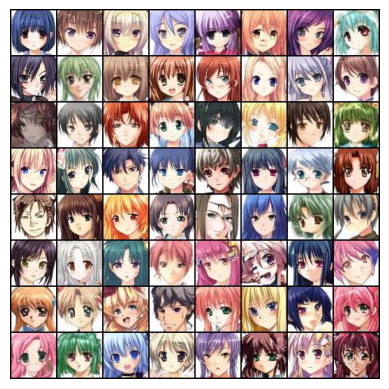

In [31]:
import matplotlib.pyplot as plt

img = plt.imread('/content/L.jpg')

plt.imshow(img)
plt.axis('off')
plt.show()

In [33]:
T = 500   # 500 or 1000
model = Unet(in_channels=3).to(device)
state_dict = torch.load('checkpoint_100epoch_T500.pth')
model.load_state_dict(state_dict['model_state_dict'])

<All keys matched successfully>

In [34]:
generate_and_save(model, gen_N=64, resolu=(64, 64))

[Denoising] step: 0: 100%|██████████| 500/500 [04:12<00:00,  1.98it/s]


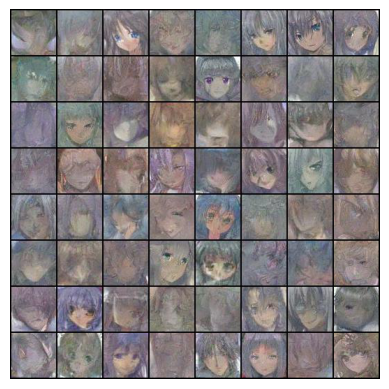

In [35]:
img = plt.imread('/content/L.jpg')

plt.imshow(img)
plt.axis('off')
plt.show()

### 1.2.b
#### **Discuss** the result based on different diffusion steps.

可以看出step越多生成出的圖像品質越高，這是因為diffusion model是透過一步一步的step從高斯雜訊解回原圖像。但是越多的step也會消耗更多的時間去sample。

## 1.3 Comparison between GAN and DDPM (10%)
#### (a) Both GAN and DDPM are generative models. The following figures are randomly generated results by using GAN (left) and DDPM (right). Please describe the pros and cons of the two models. (10%)

<img src="https://i.imgur.com/pU77cfa.jpg" width="600px"/>

### 1.3.a
### Both GAN and DDPM are generative models. The figures are randomly generated results by using GAN (left) and DDPM (right). Please describe the pros and cons of the two models based on your observation.